In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random
from evaluation_pipeline_copy import generate_synthetic_data_dict

In [2]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [3]:
for i in range(len(df)):
    if '#' in df['Evaluation'][i]:
        df['Evaluation'][i] = df['Evaluation'][i][1:]

C:\Users\nunni\AppData\Local\Temp\ipykernel_14444\515674579.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Evaluation'][i] = df['Evaluation'][i][1:]


In [4]:
data = generate_synthetic_data_dict(500,1,1,df)
data

['g7g6',
 'd1f3',
 'd8h4',
 'e1e2',
 'e8d7',
 'f1e2',
 'f8a3',
 'd1g4',
 'h8g8',
 'd1g4',
 'f8e7',
 'f1e2',
 'd8b6',
 'f1a6',
 'c6b4',
 'd1c2',
 'c6a5',
 'c1d2',
 'c6a5',
 'd1a4',
 'c6d8',
 'a1c1',
 'b4a5',
 'e2c3',
 'f8f7',
 'd2c3',
 'c6b8',
 'b2b3',
 'b6d4',
 'h1g1',
 'b6a6',
 'd2b4',
 'b7b5',
 'd2h6',
 'g8f8',
 'c2d3',
 'a8b8',
 'h7g8',
 'e5d3',
 'c3b4',
 'g7g6',
 'c2f5',
 'c4a3',
 'c2c4',
 'g7g5',
 'c2c4',
 'c8a6',
 'e2e6',
 'f6d4',
 'd3e4',
 'e8c6',
 'g1g2',
 'f6e7',
 'e2f1',
 'f6h6',
 'h2h4',
 'f6g7',
 'e2e5',
 'h8h7',
 'g5f5',
 'e6f5',
 'g1c1',
 'f6h6',
 'f1a6',
 'b7b6',
 'a2a3',
 'd5c4',
 'h1g1',
 'f8e7',
 'e1g1',
 'b7b5',
 'b2b4',
 'g7g5',
 'd1d3',
 'e6e5',
 'f3e5',
 'b7b6',
 'a2a3',
 'f6h5',
 'c1f4',
 'd6d8',
 'a1b1',
 'd6c6',
 'd3g6',
 'd6d3',
 'd3c4',
 'g4h2',
 'c1f4',
 'c5d6',
 'f3e5',
 'b7e4',
 'f3d4',
 'h8g8',
 'f3d2',
 'a8d8',
 'f1d1',
 'a8d8',
 'f3h4',
 'b7d5',
 'a1b1',
 'e8g8',
 'd3f1',
 'a8b8',
 'd3c4',
 'a8a7',
 'c4d3',
 'a8a7',
 'e1e2',
 'h7h6',
 'h3h4',
 'd8d4',
 

In [5]:
path=("stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nunni\AppData\Local\Temp\ipykernel_14444\315037162.py:1: SyntaxWarning: invalid escape sequence '\s'
  path=("stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")


In [6]:
fen=("rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [7]:

def stockfish_evaluation(board, time_limit = 0.01):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    result = engine.analyse(board, chess.engine.Limit(time=time_limit))
    return result['score']

In [8]:
def evaluate_move(stockfish,fen,move):
    board = chess.Board(fen)
    board.push_uci(move)
    return stockfish_evaluation(board)

stockfish = Stockfish(path)

In [9]:
score_ensemble = []
        
for i in range(len(data)):
    move = data[i]
    fen = df['FEN'][i]
    if 'w' in fen:
        end = evaluate_move(stockfish, fen, move).white().score()
        if type(end) == type(None):
            score_ensemble.append(0)
        else:
            score_ensemble.append(end - int(df['Evaluation'][i]))
    else:
        end = evaluate_move(stockfish, fen, move).black().score()
        if type(end) == type(None):
            score_ensemble.append(0)
        else:
            score_ensemble.append(end - int(df['Evaluation'][i]))        

print(score_ensemble)

['g7g6', 'd1f3', 'd8h4', 'e1e2', 'e8d7', 'f1e2', 'f8a3', 'd1g4', 'h8g8', 'd1g4', 'f8e7', 'f1e2', 'd8b6', 'f1a6', 'c6b4', 'd1c2', 'c6a5', 'c1d2', 'c6a5', 'd1a4', 'c6d8', 'a1c1', 'b4a5', 'e2c3', 'f8f7', 'd2c3', 'c6b8', 'b2b3', 'b6d4', 'h1g1', 'b6a6', 'd2b4', 'b7b5', 'd2h6', 'g8f8', 'c2d3', 'a8b8', 'h7g8', 'e5d3', 'c3b4', 'g7g6', 'c2f5', 'c4a3', 'c2c4', 'g7g5', 'c2c4', 'c8a6', 'e2e6', 'f6d4', 'd3e4']


c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


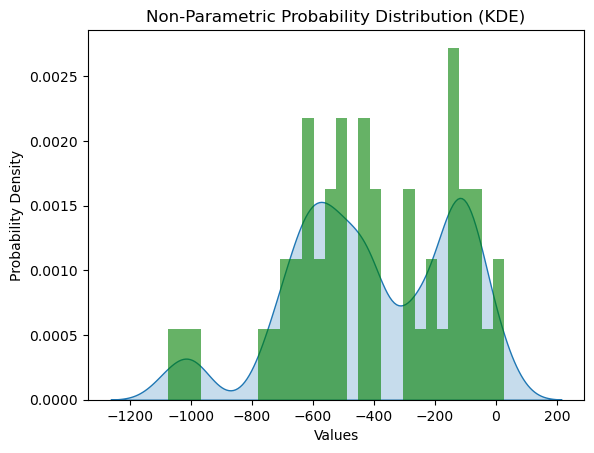

In [ ]:
# Generate some sample data (e.g., from a normal distribution)
d = score_ensemble
print(data)

# Plot the KDE using seaborn
sns.kdeplot(d, bw_adjust=0.5, fill=True)
plt.hist(d, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Non-Parametric Probability Distribution (KDE)')
plt.show()